# Introduction
Context<br> Analyse text data to understand the landscape of AI and top experts profiles deemed most important in late years. <br>
Data<br>
In this project, I take data from Linkedin about the top 20 experts in the field of AI research and industry <br>
Resources : https://www.springboard.com/blog/ai-machine-learning-experts-to-follow/<br>
Goal: find the common traits in the experience of the top chosen AI experts, and draw conclusions<br>
Expectations: technical programming skill set, entrepreneurship and management skills, innovation<br>
Findings: bottom of the notebook  <br>

# Methods and tools used
Scaping with requests and BeautifulSoup
Scraping with desktop app ParseHub
NLTK spaCy sklearn Collections and more

# Getting the data

In [154]:
#Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
#Import csv file
dt = pd.read_csv('ai-top-experts-profile-data.csv', header = 0, sep = ';', names = ['name', 'titles', 'description', 'positions details'])

In [156]:
#Check correct importing of the data
dt.head()

,name,titles,description,positions details
0,Andrew Ng,Founder and CEO of Landing AI Founder of deepl...,NaN,Landing AI will help great companies become gr...
1,Rana el Kaliouby,"CEO & Co-Founder at Affectiva Author of ""Girl ...","My life’s work is about humanizing technology,...",Emotions Matter. Really. They do! Affectiva is...
2,Ganesh Padmanabhan,Global Executive | Innovation | Technologist |...,"I am a global executive, with expertise in com...",VP/GM for Dell EMC Converged Solutions (Hybrid...
3,Carol Reiley,Founder & CEO | AI Roboticist | Board Member/I...,"A serial entrepreneur, scientist, and engineer...",NaN
4,Kai-Fu Lee,"AI Expert, CEO of (Sinovation Ventures), forme...",Sinovation Ventures is a leading venture capit...,built & led one of the top computer science la...


In [157]:
dt.isna().sum()

name                 0
titles               0
description          1
positions details    7
dtype: int64

In [158]:
dt.fillna('', inplace = True)

In [159]:
#Check that all null values are replaced by empty strings
dt.isna().sum()

name                 0
titles               0
description          0
positions details    0
dtype: int64

In [160]:
dt.shape

(21, 4)

Keep in mind that the dataset has 21 obesrvations and 4 features: name, title, description (description of the profile extracted from the introduction section in Linkedin) and positions details (extracted from the experience section in Linkedin) <br>
There is no need to keep many columns. The dataset contains only text data. So I will merge description and position details into a profile new column

In [161]:
dt['profile'] = dt['description'] + dt['positions details']
dt = dt.drop(['description', 'positions details'], axis = 1)

In [162]:
dt.head()

,name,titles,profile
0,Andrew Ng,Founder and CEO of Landing AI Founder of deepl...,Landing AI will help great companies become gr...
1,Rana el Kaliouby,"CEO & Co-Founder at Affectiva Author of ""Girl ...","My life’s work is about humanizing technology,..."
2,Ganesh Padmanabhan,Global Executive | Innovation | Technologist |...,"I am a global executive, with expertise in com..."
3,Carol Reiley,Founder & CEO | AI Roboticist | Board Member/I...,"A serial entrepreneur, scientist, and engineer..."
4,Kai-Fu Lee,"AI Expert, CEO of (Sinovation Ventures), forme...",Sinovation Ventures is a leading venture capit...


# Take a closer look at the experts in the sample

In [163]:
figures = list(dt['name'])
for i in figures: 
    print(i)

Andrew Ng
Rana el Kaliouby
Ganesh Padmanabhan
Carol Reiley
Kai-Fu Lee
Anima Anandkumar
Joy Buolamwini
Andrej Karpathy
Moustapha Cisse
Karen Hao
Timnit Gebru
Kate Crawford
Rachel Thomas
Jack Clark
Cade Metz
Martin Ford
Yann LeCun
Shivon Zilis
Demis Hassabis
Fei-Fei Li
Jeff Dean


In [164]:
#Print a text example to get an idea on how the data should be cleaned
eg = dt.iat[1,2]
eg

"My life’s work is about humanizing technology, before it dehumanizes us. I am a scientist, innovator and entrepreneur. As Affectiva's Co-founder and CEO, I am on a mission to bring artificial emotional intelligence to our digital world, creating a new partnership between humans and AI. Emotion AI is the next frontier of artificial intelligence, with commercial applications in several industries. As CEO, I am responsible for our vision and translating that into an executable strategy that transforms industries such as automotive, advertising and more. I am Chief Evangelist for the Emotion AI space, a term that we coined at Affectiva and have turned into an ecosystem. We are doing this all over again - this time building HUman Perception AI - algorithms that understand all things human! We've raised $50M+ capital from top-tier investors and non-dilutive funding. I have a demonstrated track record of translating science innovations into products that have huge markets. Previously, as a R

## Text Cleaning

In [165]:
import re
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [166]:

def remove_punctuation(text): 
    ''' removes any punctuation and string numbers ie digits and returns a list of the words cleaned'''
    text = text.lower()
    nopunc = [char for char in text if (char not in string.punctuation) & ( not char.isdigit())]
    nopunc = ''.join(nopunc)
    nopunc = nopunc.split()
    return nopunc
round1 = lambda x: remove_punctuation(x)

In [167]:
text = '!"slkhe#ç$ %&\0   8275()*+,- lkh50./"lk h_:; <=> ?lhosqiy@[\kahz\] lmj^_bnz`{|khz}~'

In [168]:
remove_punctuation(text)

['slkheç', '\x00', 'lkhlk', 'h', 'lhosqiykahz', 'lmjbnzkhz']

In [ ]:
remove_punctuation(eg)

In [170]:
# Apply a second round of cleaning
def clean_more(liste):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = [re.sub('[‘’“”…]', '', text) for text in liste ]
    text = ' '.join(text)
    text = text.split()
    return text
round2 = lambda x: clean_more(x)

In [171]:
#Test the pipeline created
R1 = remove_punctuation(eg)
R2 = clean_more(R1)

In [ ]:
R1

In [ ]:
R2

In [174]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stpwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [175]:
#Remove stopwords pipeline
def remove_stopwords(p):
    clean_text = [word for word in p if word.lower() not in stpwords]
    return clean_text
round3 = lambda x: remove_stopwords(x)

In [ ]:
stpwords

In [177]:
R3 = remove_stopwords(R2)

In [ ]:
R3

In [179]:
print(len(R2),len(R3))

519 327


In [180]:
#Now apply the cleaning pipelines on the dataframe
dt['titles'] = ((dt['titles'].apply(round1)).apply(round2)).apply(round3)
dt['profile'] = ((dt['profile'].apply(round1)).apply(round2)).apply(round3)

In [181]:
dt.iat[5,1]

['director', 'ml', 'research', 'nvidia', 'bren', 'professor', 'caltech']

In [ ]:
dt.iat[11,2]

In [183]:
dt.head()

,name,titles,profile
0,Andrew Ng,"[founder, ceo, landing, ai, founder, deeplearn...","[landing, ai, help, great, companies, become, ..."
1,Rana el Kaliouby,"[ceo, cofounder, affectiva, author, girl, deco...","[lifes, work, humanizing, technology, dehumani..."
2,Ganesh Padmanabhan,"[global, executive, innovation, technologist, ...","[global, executive, expertise, commercializing..."
3,Carol Reiley,"[founder, ceo, ai, roboticist, board, memberin...","[serial, entrepreneur, scientist, engineer, ye..."
4,Kai-Fu Lee,"[ai, expert, ceo, sinovation, ventures, former...","[sinovation, ventures, leading, venture, capit..."


# Vectorize the data
Now that the text data is tokenized, we should vectorize it

In [184]:
from sklearn.feature_extraction.text import CountVectorizer

In [185]:
cv = CountVectorizer(stop_words='english') #cv is for count vectorizer instance

In [ ]:
test_cv = cv.fit_transform(R3)
print(test_cv) #All words here are unique

In [187]:
#Before applying the countvectorize, transform the lists inside the dataframe to text
def list_to_text(liste):
  p =''
  for x in liste: 
    p = p+' '+x
  return p
toText = lambda y: list_to_text(y)

In [188]:
#Test on R3
print(list_to_text(R3))

 lifes work humanizing technology dehumanizes us scientist innovator entrepreneur affectivas cofounder ceo mission bring artificial emotional intelligence digital world creating new partnership humans ai emotion ai next frontier artificial intelligence commercial applications several industries ceo responsible vision translating executable strategy transforms industries automotive advertising chief evangelist emotion ai space term coined affectiva turned ecosystem time building human perception ai algorithms understand things human weve raised capital toptier investors nondilutive funding demonstrated track record translating science innovations products huge markets previously research scientist mit media lab built emotion technology focus mental health one women leading ai company passionate women tech leadership also limited partner mit media labs e funds trustee american university cairo areas expertise affective computing artificial intelligence emotion recognition emotion analyti

In [189]:
dt['titles'] = dt['titles'].apply(toText)

In [190]:
dt['titles'].iloc[3]

' founder ceo ai roboticist board memberinvestor writer forbes top women tech guerlain spokesmodel'

In [191]:
dt['profile'] = dt['profile'].apply(toText)

In [192]:
dt['profile'].iloc[2]

' global executive expertise commercializing building fast growth businesses big data cloud artificial intelligence last two decades built developed organizations delivered breakthrough growth early stage startups molecula growthstage businesses cognitivescale fortune organizations like dell intel lived worked asia america leadership ethos based strong focus culture results collaborationi live intersection business tech helping organizations unlock business value technology big believer human machine partnership building better inclusive future technologyvpgm dell emc converged solutions hybrid cloud sddchyperconverged big dataanalytics business apps hpc lead portfolio strategy go market product management business development solutions saleshelped build youngest b business dell emc'

In [193]:
dt.head()

,name,titles,profile
0,Andrew Ng,founder ceo landing ai founder deeplearningai,landing ai help great companies become great ...
1,Rana el Kaliouby,ceo cofounder affectiva author girl decoded m...,lifes work humanizing technology dehumanizes ...
2,Ganesh Padmanabhan,global executive innovation technologist go m...,global executive expertise commercializing bu...
3,Carol Reiley,founder ceo ai roboticist board memberinvesto...,serial entrepreneur scientist engineer years ...
4,Kai-Fu Lee,ai expert ceo sinovation ventures former pres...,sinovation ventures leading venture capital f...


In [194]:
profile_cv = cv.fit_transform(dt['profile'])

In [195]:
titles_cv = cv.fit_transform(dt['titles'])

In [196]:
print('Shape of Sparse Matrix: ', profile_cv.shape)

Shape of Sparse Matrix:  (21, 1225)


## Find common keywords

In [197]:
from collections import Counter

In [198]:
keywords = Counter(" ".join(dt["profile"]).split()).most_common(200)

In [199]:
common_positions = Counter(" ".join(dt["titles"]).split()).most_common(50)

In [ ]:
common_positions

In [201]:
type(keywords)


list

In [202]:
print(keywords)

[('ai', 57), ('learning', 40), ('data', 29), ('machine', 24), ('research', 23), ('technology', 22), ('intelligence', 19), ('deep', 19), ('computer', 18), ('artificial', 17), ('emotion', 17), ('business', 16), ('new', 16), ('google', 14), ('world', 13), ('system', 13), ('robotics', 13), ('university', 12), ('vision', 12), ('future', 12), ('building', 11), ('including', 11), ('tech', 11), ('times', 10), ('science', 9), ('development', 9), ('york', 9), ('companies', 8), ('many', 8), ('team', 8), ('also', 8), ('neural', 8), ('googles', 8), ('products', 8), ('mit', 8), ('systems', 7), ('scientist', 7), ('media', 7), ('social', 7), ('experience', 7), ('forbes', 7), ('language', 7), ('largescale', 7), ('center', 7), ('software', 7), ('working', 6), ('several', 6), ('human', 6), ('women', 6), ('lead', 6), ('product', 6), ('cloud', 6), ('review', 6), ('professor', 6), ('network', 6), ('implications', 6), ('distributed', 6), ('ethics', 6), ('implementor', 6), ('applications', 5), ('top', 5), ('b

In [203]:
keywords[0]

('ai', 57)

In [204]:
keywords[0][1]
keywords[0][0]

'ai'

In [ ]:
commonwords = pd.DataFrame(columns=['term', 'frequency'], index=range(0,199))
commonwords

In [206]:
commonwords.dtypes

term         object
frequency    object
dtype: object

In [ ]:
#fill commonwords dataframe with keywords and their frequencies
for i in range(0,199):
  commonwords['term'][i] = keywords[i][0]
  commonwords['frequency'][i] = keywords[i][1]

commonwords #contains the common words and their frequencies

Display common words with frequencies

In [208]:
pip install wordcloud

In [209]:
from wordcloud import WordCloud

In [210]:
cld = list_to_text(commonwords['term']) #common words are already sorted in the dataframe from the most frequent(57) to less(3) 
print(cld)
cld

 ai learning data machine research technology intelligence deep computer artificial emotion business new google world system robotics university vision future building including tech times science development york companies many team also neural googles products mit systems scientist media social experience forbes language largescale center software working several human women lead product cloud review professor network implications distributed ethics implementor applications top build mental health projects recognition computational one work digital strategy algorithms analytics facial big used first worked bias design training natural models well reporter related help every two ways solutions startup industries education access organizations small people leading global person responsible businesses platform developed next funding built principal market fortune like based years robots understanding wired atlantic china microsoft economic magazine algorithmic large speaker analysis wri

' ai learning data machine research technology intelligence deep computer artificial emotion business new google world system robotics university vision future building including tech times science development york companies many team also neural googles products mit systems scientist media social experience forbes language largescale center software working several human women lead product cloud review professor network implications distributed ethics implementor applications top build mental health projects recognition computational one work digital strategy algorithms analytics facial big used first worked bias design training natural models well reporter related help every two ways solutions startup industries education access organizations small people leading global person responsible businesses platform developed next funding built principal market fortune like based years robots understanding wired atlantic china microsoft economic magazine algorithmic large speaker analysis wr

In [ ]:
pip install spacy

In [212]:
 import spacy
 nlp = spacy.load('en_core_web_sm')

In [214]:
#nltk.download()

In [216]:
tokens = nlp(cld)

In [215]:
len(tokens)

200

In [ ]:
cloud_nouns = list()
for token in tokens:
  if token.pos_ == 'NOUN': 
    token = str(token)
    cloud_nouns.append(token)
cloud_nouns

In [218]:
print(cloud_nouns)
cloud_nouns
len(cloud_nouns)

['research', 'technology', 'intelligence', 'computer', 'emotion', 'business', 'university', 'vision', 'building', 'tech', 'companies', 'team', 'scientist', 'media', 'experience', 'center', 'software', 'women', 'product', 'professor', 'network', 'implications', 'ethics', 'implementor', 'applications', 'health', 'projects', 'work', 'strategy', 'bias', 'design', 'training', 'models', 'reporter', 'help', 'ways', 'startup', 'industries', 'education', 'access', 'organizations', 'people', 'person', 'businesses', 'platform', 'funding', 'market', 'fortune', 'years', 'robots', 'understanding', 'magazine', 'source', 'processing', 'writer', 'economy', 'engineering', 'neuroscience', 'knowledge', 'courses', 'number', 'students', 'group', 'advertising', 'consumer', 'networks', 'speech', 'partnership', 'translating', 'affectiva', 'things', 'company', 'leadership', 'funds', 'sdk', 'growth', 'startups', 'culture', 'engineer', 'interests', 'application', 'technologies', 'director', 'aspects', 'awards', '

90

In [219]:
nouns = list_to_text(cloud_nouns)

In [220]:
nouns

' research technology intelligence computer emotion business university vision building tech companies team scientist media experience center software women product professor network implications ethics implementor applications health projects work strategy bias design training models reporter help ways startup industries education access organizations people person businesses platform funding market fortune years robots understanding magazine source processing writer economy engineering neuroscience knowledge courses number students group advertising consumer networks speech partnership translating affectiva things company leadership funds sdk growth startups culture engineer interests application technologies director aspects awards award joy publications degree topics'

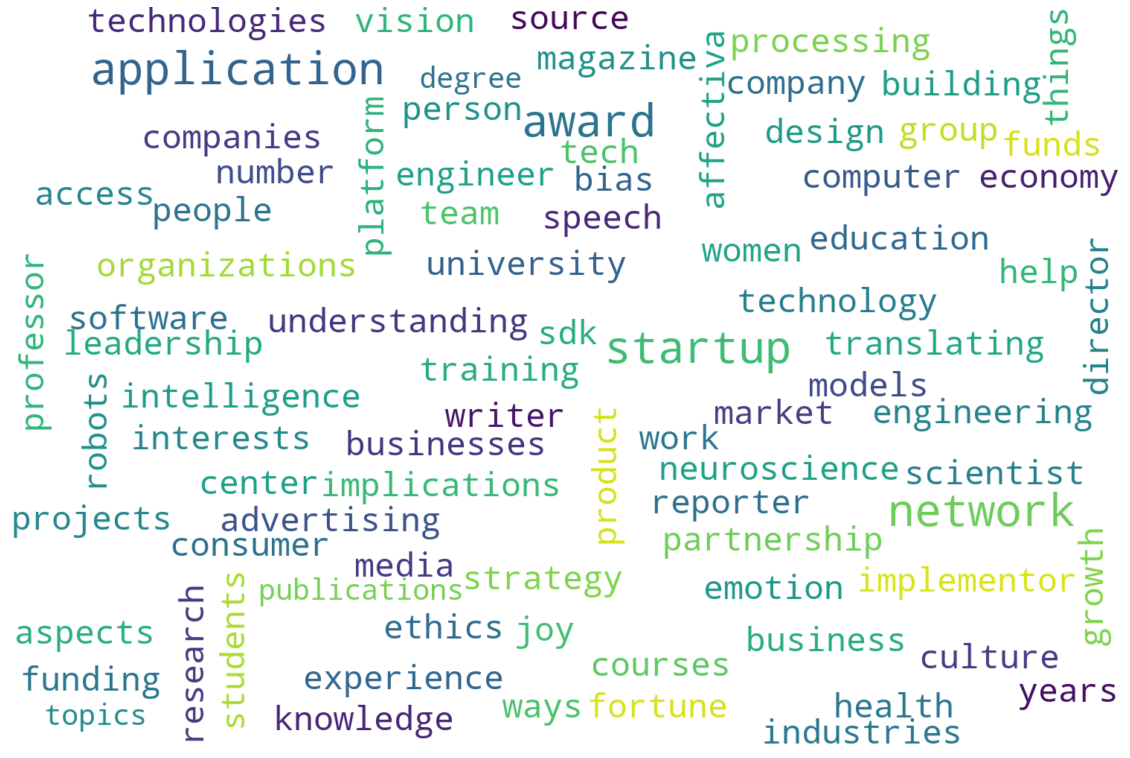

<Figure size 432x288 with 0 Axes>

In [221]:
wordcld = WordCloud(max_font_size=60, max_words=100, background_color="white", width=1500, height=1000).generate(nouns)
fig = plt.figure(figsize=(20,30))
plt.imshow(wordcld, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('ai_wordCloud.png')

We have 200 common words between all the profiles<br>
We  need to analyse further the results to be able to draw meaningful conclusions<br>
separate the words that are tightly related to AI dictionary from those that are less related, then investigate both parts<br>
what is most important now as an AI technology<br>
what other skills make experts what they are today<br> 
what is essential to foster the advancement of AI technologies in real life (and business field)

# Analyse commom words

In [222]:
import requests
from bs4 import BeautifulSoup as bs

In [223]:
#scrape terms related to ai
def glossary(url):
  page = requests.get(url).text
  soup = bs(page, "lxml") 
  text = [strong.text for strong in soup.find().find_all('strong')]
  return text

In [224]:
ai_terms = glossary('https://learn.g2.com/artificial-intelligence-terms')

### Clean the list of glossary from non relevant keywords and characters

In [ ]:
#clean text in glossary
ai_terms

In [227]:
#convert ai_terms list to dataframe for easier manipulation
ai_dt = pd.DataFrame(ai_terms, columns=['ai term'])

In [ ]:
ai_dt.head(40)

In [ ]:
ai_dt.tail(20)

In [228]:
ai_dt = ai_dt.iloc[34:94]

In [ ]:
ai_dt.shape

In [ ]:
ai_dt.tail(10)

In [ ]:
#Make text lowercase and remove characters from ai terms
print(ai_dt)

In [229]:
def clean_ai(liste): 
  term = [str(term).lower() for term in liste if len(term.lower())!=0] 
  return term
round4 = lambda x: clean_ai(x)

In [230]:
ai_dt = (ai_dt['ai term'].apply(round1)).apply(round4)
ai_dt = pd.DataFrame(ai_dt, columns = ['ai term'])

In [231]:
ai_dt.head(3)

,ai term
34,[a]
35,[algorithm]
36,"[artificial, intelligence]"


In [232]:
for i in range(0,len(ai_dt)):
  #test 
  #print(ai_dt.iat[i,0])
  if len(ai_dt.iat[i,0]) ==1: 
    ai_dt.iat[i,0] = None



In [233]:
#remove null values that were characters
ai_dt.isna().sum()

ai term    24
dtype: int64

In [234]:
ai_dt = ai_dt.dropna()

In [235]:
ai_dt.isna().sum()

ai term    0
dtype: int64

In [ ]:
ai_dt

In [237]:
#reconvert ai_dt content to a list of strings
ai_glossary = list()
for i in range(0,len(ai_dt)-1):
  for ai in ai_dt.iloc[i]: 
    #ai_term=''
    for j in range(0,len(ai)-1): 
      #ai_term = ai_term + ' '+str(ai[j])
      ai_term = str(ai[j])
  ai_glossary.append(ai_term)
ai_glossary
len(ai_glossary)

35

In [238]:
#keep unique words
ai_glossary = list(dict.fromkeys(ai_glossary))
ai_glossary

['artificial',
 'intelligence',
 'strong',
 'weak',
 'network',
 'bayesian',
 'decision',
 'big',
 'cognitive',
 'computer',
 'data',
 'deep',
 'digital',
 'networks',
 'genetic',
 'image',
 'limited',
 'learning',
 'machine',
 'processing',
 'neural',
 'recognition',
 'pattern',
 'reactive',
 'reinforcement',
 'automation',
 'structured',
 'supervised',
 'transfer',
 'turing',
 'unstructured']

## Divide cloud nouns into ai terms and other terms

In [239]:
type(cloud_nouns) #list of strings

list

In [240]:
print(cloud_nouns)

['research', 'technology', 'intelligence', 'computer', 'emotion', 'business', 'university', 'vision', 'building', 'tech', 'companies', 'team', 'scientist', 'media', 'experience', 'center', 'software', 'women', 'product', 'professor', 'network', 'implications', 'ethics', 'implementor', 'applications', 'health', 'projects', 'work', 'strategy', 'bias', 'design', 'training', 'models', 'reporter', 'help', 'ways', 'startup', 'industries', 'education', 'access', 'organizations', 'people', 'person', 'businesses', 'platform', 'funding', 'market', 'fortune', 'years', 'robots', 'understanding', 'magazine', 'source', 'processing', 'writer', 'economy', 'engineering', 'neuroscience', 'knowledge', 'courses', 'number', 'students', 'group', 'advertising', 'consumer', 'networks', 'speech', 'partnership', 'translating', 'affectiva', 'things', 'company', 'leadership', 'funds', 'sdk', 'growth', 'startups', 'culture', 'engineer', 'interests', 'application', 'technologies', 'director', 'aspects', 'awards', '

In [244]:
#take every word in cloud_nouns, searches for it in every string of words in ai_glossary and returns it if found in a list of words
found_ai=''
related_ai=''
test=0
j= 0
for i in range(0,len(cloud_nouns)): 
  for j in range(0,len(ai_glossary)):
    if cloud_nouns[i] == ai_glossary[j]: 
      found_ai=found_ai+' '+ai_glossary[j] 
      test = 1
      break
    else:
      test=0 
  if test==0: 
    related_ai = related_ai+' '+cloud_nouns[i]



In [245]:
found_ai

' intelligence computer network processing networks'

In [246]:
print(related_ai)

 research technology emotion business university vision building tech companies team scientist media experience center software women product professor implications ethics implementor applications health projects work strategy bias design training models reporter help ways startup industries education access organizations people person businesses platform funding market fortune years robots understanding magazine source writer economy engineering neuroscience knowledge courses number students group advertising consumer speech partnership translating affectiva things company leadership funds sdk growth startups culture engineer interests application technologies director aspects awards award joy publications degree topics


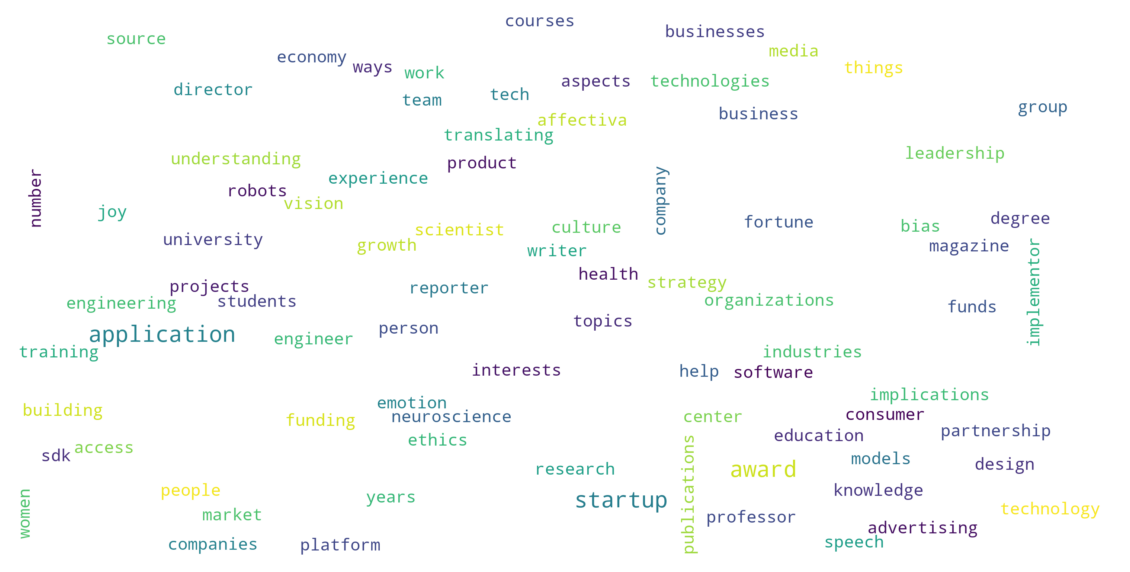

<Figure size 432x288 with 0 Axes>

In [247]:
wordcld = WordCloud(max_font_size=60, max_words=100, background_color="white", width=3000, height=1500).generate(related_ai)
fig = plt.figure(figsize=(20,30))
plt.imshow(wordcld, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('words related to ai_wordCloud.png')

In [248]:
#Common positions Cloud of words analysis
#convert the list of tuples to text to be able to run cloud of words algorithm
positions_text =''
for i in range(0,50):
  #length of common_positions is already known to be 50 
  positions_text = positions_text + ' '+ str(common_positions[i][0])

In [249]:
print(common_positions)

[('ai', 9), ('founder', 6), ('ceo', 5), ('director', 5), ('google', 4), ('author', 3), ('research', 3), ('professor', 3), ('senior', 3), ('stanford', 3), ('cofounder', 2), ('data', 2), ('intelligence', 2), ('researcher', 2), ('scientist', 2), ('center', 2), ('reporter', 2), ('institute', 2), ('openai', 2), ('new', 2), ('york', 2), ('times', 2), ('landing', 1), ('deeplearningai', 1), ('affectiva', 1), ('girl', 1), ('decoded', 1), ('member', 1), ('ypo', 1), ('ygl', 1), ('world', 1), ('economic', 1), ('forum', 1), ('global', 1), ('executive', 1), ('innovation', 1), ('technologist', 1), ('go', 1), ('market', 1), ('strategy', 1), ('artificial', 1), ('roboticist', 1), ('board', 1), ('memberinvestor', 1), ('writer', 1), ('forbes', 1), ('top', 1), ('women', 1), ('tech', 1), ('guerlain', 1)]


In [250]:
print(positions_text)

 ai founder ceo director google author research professor senior stanford cofounder data intelligence researcher scientist center reporter institute openai new york times landing deeplearningai affectiva girl decoded member ypo ygl world economic forum global executive innovation technologist go market strategy artificial roboticist board memberinvestor writer forbes top women tech guerlain


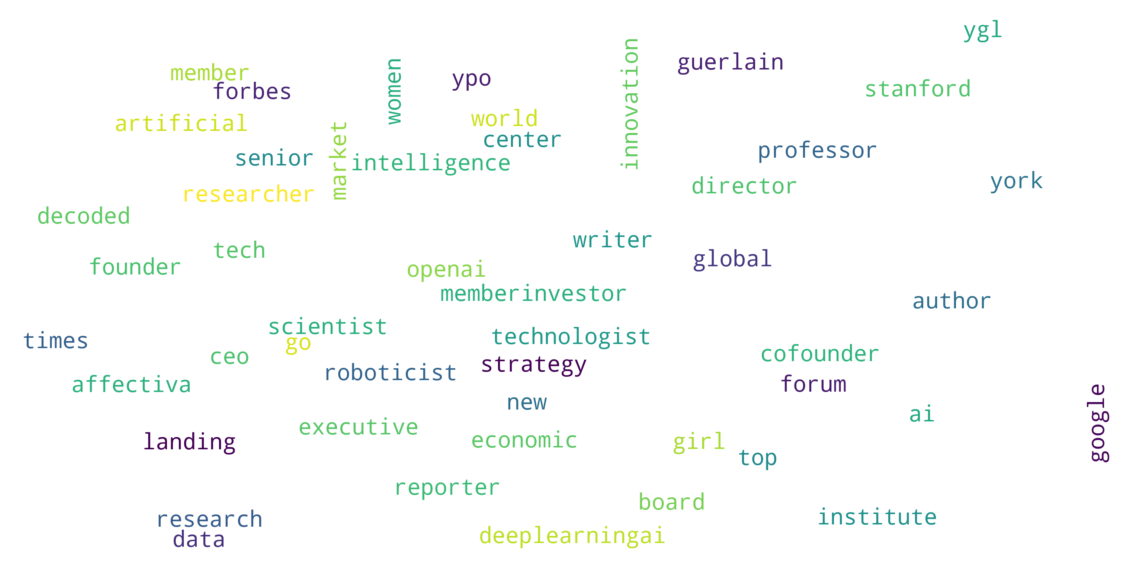

<Figure size 432x288 with 0 Axes>

In [251]:
wordcld = WordCloud(max_font_size=60, max_words=100, background_color="white", width=3000, height=1500).generate(positions_text)
fig = plt.figure(figsize=(20,30))
plt.imshow(wordcld, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('ai positions word cloud.png')

# Findings

The data doesn't describe well technical expertise of the profiles. It rather mentions their professional and academic experiences. The results broaden the horizon of the analysis to the importance of the application of AI to the real world through business creation and sustainability, and innovation in businesses. <br>
A-word cloud common positions (50):
top positions: ceo founder/cofounder executive board member investor
roboticist researcher scientist director technologist author
senior(positions) professor writer reporter. <br>
These are the roles that are deemed to contribute the most to the advancement of AI. 

B-word cloud common nouns/words: <br>
words that most related to ai profiles/experiences : <br>
leadership positions/roles<br>
company: companies play a major role in the advancement by implementing
adopting technologies and commercializing AI solutions, educative content <br>
university level projects and research<br>
parterships between businesses<br>
rise of startups, founding startups<br>
team work being part of small and large teams<br>
doing publications scientific research in the field of AI<br>
working on bias problems in AI<br>
builiding systems ai solutions software <br>
visionary thinking<br>
related fields: robotics, neuroscience, healthcare, education <br>
translating, speech recognition and nlp are one of AI technologies 
that top experts master <br>
working on ethics issues related to AI <br>
training students, teaching students, doing projects and research as a student<br>
